###  Constructing a network diagram from NetworkX graphs

In [1]:
# data import and network analysis
import networkx as nx
import pandas as pd

# data visualization generally
import holoviews as hv
from holoviews import opts, dim
#from holoviews.plotting.links import DataLink

# visualization of networks
import hvplot.networkx as hvnx
from holoviews.operation.datashader import datashade, bundle_graph


# styling of plots
from bokeh.themes import built_in_themes
import colorcet as cc

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
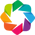

In [2]:
hv.extension('bokeh')
hv.output(size=200)
hv.renderer('bokeh').theme='caliber'

In [3]:
#import dask
#from distributed import Client
#Client()

In [4]:
nodes = pd.read_csv('./D3out_Author_nodes_processed.csv',index_col=0)
nodes.head()

author                                                DOI  \
0  A.  Abdel-Gadir                     ['10.1016/j.jcmg.2015.11.008']   
1          A.  Abe                  ['10.1080/15548627.2015.1100356']   
2      A.  Abizaid                   ['10.1016/j.ijcard.2013.03.064']   
3     A.  Abubakar                   ['10.1371/journal.pone.0113360']   
4        A.  Abulí  ['10.1136/gutjnl-2011-300537', '10.1186/1471-2...   

   DOI_count  CR_citations primary_affiliation  \
0          1            80               {nan}   
1          1          3007               {nan}   
2          1             1               {nan}   
3          1            34               {nan}   
4          2           106               {nan}   

                             research_group          group_type  \
0                        ['cardiovascular']           ['Theme']   
1             ['immunity and inflammation']           ['Theme']   
2                        ['cardiovascular']           ['Theme']   
3              ['translational physiology']           ['Theme']   
4  ['genomic medicine', 'genomic medicine']  ['Theme', 'Theme']   

               primary_group primary_type  Ox_author  
0             cardiovascular        Theme          0  
1  immunity and inflammation        Theme          0  
2             cardiovascular        Theme          0  
3   translational physiology        Theme          0  
4           genomic medicine        Theme          0

In [5]:
nodes[nodes.author.str.contains('Rothwell')]

author                                                DOI  \
8720         J.  Rothwell                   ['10.1016/j.eururo.2014.01.003']   
14898        P.  Rothwell  ['10.4244/eijv12i10a202', '10.3174/ajnr.a3090'...   
15292     P. M.  Rothwell  ['10.1161/strokeaha.113.679936', '10.1161/stro...   
15301  P. M. W.  Rothwell                              ['10.1002/ana.23838']   

       DOI_count  CR_citations  \
8720           1           130   
14898          4           162   
15292         85          4088   
15301          1            89   

                                     primary_affiliation  \
8720                                               {nan}   
14898                                              {nan}   
15292  {nan, 'From the George Institute for Global He...   
15301  {'Stroke Prevention Research Unit, University ...   

                                          research_group  \
8720              ['surgical innovation and evaluation']   
14898  ['cardiovascular', 'dementia and cerebrovascul...   
15292  ['dementia and cerebrovascular disease', 'deme...   
15301           ['dementia and cerebrovascular disease']   

                                              group_type  \
8720                                           ['Theme']   
14898      ['Theme', 'Theme', 'Theme', 'Theme', 'Theme']   
15292  ['Theme', 'Theme', 'Theme', 'Theme', 'Theme', ...   
15301                                          ['Theme']   

                              primary_group primary_type  Ox_author  
8720     surgical innovation and evaluation        Theme          0  
14898  dementia and cerebrovascular disease        Theme          0  
15292  dementia and cerebrovascular disease        Theme         34  
15301  dementia and cerebrovascular disease        Theme          1

In [6]:
edges = pd.read_csv('./D4out_edge_coded_for_graphing.csv', usecols=[0,1,4,5])
edges.head()

source  target            timestamp    weight
0    1684    8996  2014-08-30 14:03:56  0.111111
1    1684    8693  2014-08-30 14:03:56  0.111111
2    1684    7142  2014-08-30 14:03:56  0.111111
3    1684   18477  2014-08-30 14:03:56  0.111111
4    1684    1637  2014-08-30 14:03:56  0.111111

In [7]:
edge_weight_distributions =(hv.Distribution(edges.weight, label='all')).opts(height=100)
edge_weight_distributions

:Distribution   [weight]   (Density)

## We will now construct a Graph of all of the 1:1 connections edges

- this network (Graph is a MultiGraph, in that it can have multiple separate connections between the same to nodes (authors in this case)

In [8]:
G1multi =nx.from_pandas_edgelist(edges,  edge_attr='weight', create_using=nx.MultiGraph)

In [9]:
# uncomment below if you want to save the network file for Gephi
# This will take some time and generate a file of approx 1GB

# nx.write_gexf(G1multi, './author_networks/Full_OxBRC2_network_from Networkx.gexf')

In [10]:
#information about the current network (without summed edges)
nx.info(G1multi)

'Name: \nType: MultiGraph\nNumber of nodes: 20225\nNumber of edges: 5395986\nAverage degree: 533.5956'

In [11]:
# an example of multiple edges (publications) connecting 2 author nodes, taking first example from edges list
G1multi.get_edge_data(1684,8996)

{0: {'weight': 0.1111111111111111},
 1: {'weight': 0.07692307692307693},
 2: {'weight': 0.038461538461538464}}

## The MultiGraph can now be summated so that the relationship between any two nodes (authors) is the sum of all the connections (edges)

In [12]:
# Function to create a Graph from weighted MultiGraph
# using source (s), target (t) and weight data from edges

def merge_edge_weights(Graph_in):
    Graph_out = nx.Graph()
    for s,t,data in Graph_in.edges(data=True):
        w = data['weight'] if 'weight' in data else 1.0
        if Graph_out.has_edge(s,t):
            Graph_out[s][t]['weight'] += w
        else:
            Graph_out.add_edge(s, t, weight=w)
    return Graph_out


In [13]:
G1 = merge_edge_weights(G1multi)

In [14]:
# weight should now  give a single (summed) edge

G1.get_edge_data(1684, 8996)['weight']

0.2264957264957265

In [15]:
nx.info(G1)

'Name: \nType: Graph\nNumber of nodes: 20225\nNumber of edges: 4296252\nAverage degree: 424.8457'

In [16]:
nx.density(G1)

0.021007005836241023

## In order to make plotting feasible for a subset or core of the overall network, we will take just those nodes (authors) connected by edges of at least weight 0.5

In [17]:
G2 = nx.Graph( [ (s,t,edge_attr) for s,t,
                         edge_attr in G1.edges(data=True) if edge_attr['weight']>=0.5])

In [18]:
nx.info(G2)

'Name: \nType: Graph\nNumber of nodes: 928\nNumber of edges: 1466\nAverage degree:   3.1595'

In [19]:
hv.Graph.from_networkx(G2, positions=nx.layout.kamada_kawai_layout)

:Graph   [start,end]   (weight)

In [20]:
# no node data at present
G2.nodes[4876]

{}

In [21]:
nodes.columns

Index(['author', 'DOI', 'DOI_count', 'CR_citations', 'primary_affiliation',
       'research_group', 'group_type', 'primary_group', 'primary_type',
       'Ox_author'],
      dtype='object')

In [22]:
# Add some more data to the nodes in the network graph

nx.set_node_attributes(G2, pd.Series(nodes.author, index=nodes.index).to_dict(), 'label')
nx.set_node_attributes(G2, pd.Series(nodes.DOI_count, index=nodes.index).to_dict(), 'DOI_count')
nx.set_node_attributes(G2, pd.Series(nodes.CR_citations, index=nodes.index).to_dict(), 'CR_citations')
nx.set_node_attributes(G2, pd.Series(nodes.primary_group, index=nodes.index).to_dict(), 'primary_group')
nx.set_node_attributes(G2, pd.Series(nodes.primary_type, index=nodes.index).to_dict(), 'primary_type')
nx.set_node_attributes(G2, pd.Series(nodes.Ox_author, index=nodes.index).to_dict(), 'Ox_mentions')


In [23]:
# check our nodes now have associated data
G2.nodes[4876]

{'label': 'E.  Barnes',
 'DOI_count': 41,
 'CR_citations': 2501,
 'primary_group': 'immunity and inflammation',
 'primary_type': 'Theme',
 'Ox_mentions': 13}

--- 


### For consistency wit the other figures in the paper we will restrict the network further to those authors with a primary association to work that was part of a Theme or Working Group (rather than the small number of other research efforts from the BRC)

This only removes 13 of 928 nodes (authors) 

---

In [24]:
# check selector works
G2.nodes[4876]['primary_type']

'Theme'

In [25]:
# create a list of relevent nodes
G2_focus_list =[x for x,y in G2.nodes(data=True) if y['primary_type']!= 'Other']

In [26]:
len(G2_focus_list)

915

In [27]:
# and create a subnetwork of G2 from this list
G2_focus = nx.subgraph( G2, nbunch = G2_focus_list)
nx.info(G2_focus)

'Name: \nType: Graph\nNumber of nodes: 915\nNumber of edges: 1440\nAverage degree:   3.1475'

In [28]:
authorNet_focus = hvnx.draw(G2_focus,pos=nx.kamada_kawai_layout, label='Co-Authorship: weight>=0.5')

authorNet_focus.opts(bgcolor='#D9D9D9',edge_color='white',
                     node_color='primary_group',
                     cmap='category20',node_size=(dim('DOI_count').norm()*20)) 


labels = hv.Labels(authorNet_focus.nodes, ['x', 'y'], 'label').opts(text_alpha=0.4 )
(authorNet_focus * labels)

:Overlay
   .Graph.Co_hyphen_minus_Authorship_colon_weight_greater_than_equals_0_full_stop_5 :Graph   [start,end]   (weight)
   .Labels.I                                                                        :Labels   [x,y]   (label)

In [29]:
#bundling of edges allows a clearer pattern of connections in many cases (as opposed to straight lines)

author_bundled = bundle_graph(authorNet_focus, group='primary_type', iterations=1000, decay=0.5, tension=0.1) 
author_bundled2 = bundle_graph(authorNet_focus, group='primary_group', iterations=1000, decay=0.5, tension=0.1) 

In [50]:

Final_net_focus =((author_bundled.opts(width= 800,
                                 height= 800,
                                 bgcolor='white',
                                 title = '',
                                 edge_color='grey',
                                 node_color='primary_type',
                                 cmap=['#1f77b4','#ff7f0e','#2ca02c'],
                                 node_size=(dim('DOI_count').norm()*160+20).str()))\
*hv.Text(x=-0.65, y=1, text='Theme', fontsize=64).opts(text_color='#1f77b4')\
*hv.Text(x=-0.65, y=0.80, text='Working Group', fontsize=64).opts(text_color='#ff7f0e'))
#*hv.Text(x=-0.65, y=0.75, text='Others', fontsize=24).opts(text_color='#2ca02c'))

Final_net_focus

:Overlay
   .Graph.Co_hyphen_minus_Authorship_colon_weight_greater_than_equals_0_full_stop_5 :Graph   [start,end]   (weight)
   .Text.I                                                                          :Text   [x,y]
   .Text.II                                                                         :Text   [x,y]

In [51]:
author_bundled.nodes.data.shape

(915, 9)

In [52]:
hv.save(Final_net_focus.opts(toolbar=None), './Figures/Authors_0.5edge_weight_bundled_type_focus.png', dpi=1200)
hv.save(Final_net_focus.opts(toolbar='above'), './Figures/Authors_0.5edge_weight_bundled_type_focus.html', backend='bokeh')

In [53]:

Final_net2_focus =(author_bundled2.opts(width= 800,
                                        height= 800,
                                        bgcolor='white',
                                        title = '',
                                        edge_color='grey',
                                        node_color='primary_group',
                                        show_legend = True,
                                        cmap=cc.glasbey,
                                        node_size=(dim('DOI_count').norm()*160+20).str()))

Final_net2_focus

:Graph   [start,end]   (weight)

In [54]:
hv.save(Final_net2_focus.opts(toolbar=None), './Figures/Authors_0.5edge_weight_bundled_group_focus.png', dpi=1200)
hv.save(Final_net2_focus.opts(toolbar='above'), './Figures/Authors_0.5edge_weight_bundled_group_focus.html', backend='bokeh')

In [55]:
dual_nets = Final_net_focus + Final_net2_focus

In [57]:
hv.save(dual_nets.opts(toolbar=None), './Figures/Authors_2network_style_focus.png', dpi=1200)
hv.save(dual_nets.opts(toolbar=None), './Figures/Figure4.png', dpi=2400)

---


### Additional figure for network characteristics

In [37]:
df = pd.read_csv('./Source_files/graph_data_stage_type.txt')
df

group_type  stage  nodes    edges  diameter  density  av_path_length
0      Theme  Start   6325   269885         9    0.013           3.813
1      Theme    Mid   8309   774841        11    0.023           3.472
2      Theme    End  10542  3522351        10    0.063           2.970
3         WG  Start    303     1894         4    0.041           2.022
4         WG    Mid    322     2432         5    0.047           2.481
5         WG    End    286     1609         6    0.039           2.581
6      Other  Start     56      365         1    0.237           1.000
7      Other    Mid     66      351         2    0.164           1.397
8      Other    End     85      387         2    0.108           1.467

In [38]:
df_plot = df.melt(id_vars=['group_type','stage'], value_vars=['nodes','edges','diameter','density','av_path_length'])
df_plot.head()

group_type  stage variable    value
0      Theme  Start    nodes   6325.0
1      Theme    Mid    nodes   8309.0
2      Theme    End    nodes  10542.0
3         WG  Start    nodes    303.0
4         WG    Mid    nodes    322.0

In [39]:
import seaborn as sns

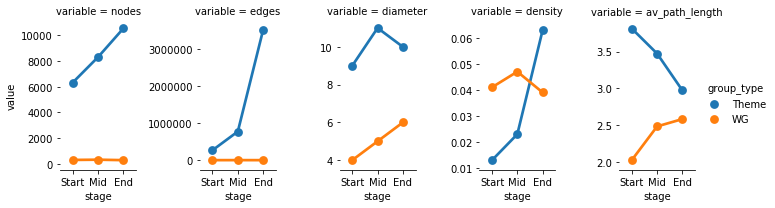

In [41]:
df_plot2 = df_plot[df_plot.group_type!='Other']

df_plot2

# Draw a pointplot to show pulse as a function of three categorical factors
g2 = sns.catplot(x= 'stage', y="value", hue="group_type", col="variable",
                capsize=.5, height=3, aspect=0.66,
                kind="point", data=df_plot2, sharey=False)
g2.despine(left=True)

g2.savefig('./Figures/Figure3.png', dpi=2400)
g2